<a href="https://colab.research.google.com/github/dami163/Assignment-2/blob/main/Question_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

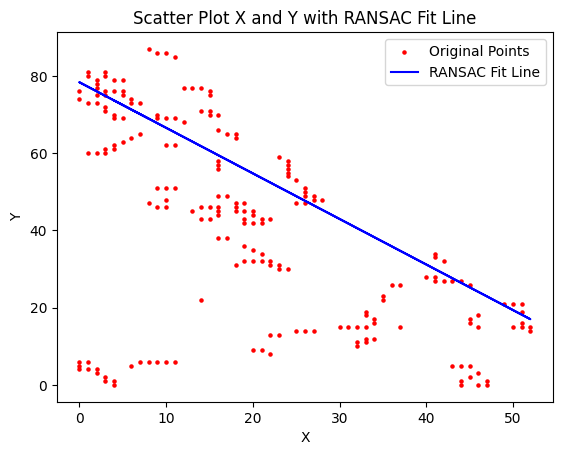

In [6]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def ransac_line_fitting(img_path, threshold=5, iterations=1000, sample_size=2):
    # Read and detect edges
    img = cv.imread(img_path, cv.IMREAD_GRAYSCALE)
    edges = cv.Canny(img, 550, 690)

    indices = np.where(edges != 0)
    x = indices[1]
    y = indices[0]
    points = np.column_stack((x, y))

    best_model = None
    best_inliers = []

    # RANSAC iterations
    for _ in range(iterations):
        sample_indices = np.random.choice(len(points), sample_size, replace=False)
        sample_points = points[sample_indices]

        x1, y1 = sample_points[0]
        x2, y2 = sample_points[1]

        if x2 - x1 != 0:
            model_slope = (y2 - y1) / (x2 - x1)
            model_intercept = y1 - model_slope * x1

            # Calculate distances
            distances = np.abs(points[:, 1] - model_slope * points[:, 0] - model_intercept)

            # Identify inliers
            inliers = points[distances < threshold]

            if len(inliers) > len(best_inliers):
                best_inliers = inliers
                best_model = (model_slope, model_intercept)

    if best_model is not None:
        x_inliers = best_inliers[:, 0]
        y_inliers = best_inliers[:, 1]

        m, c = np.polyfit(x_inliers, y_inliers, 1)
        fitted_y = m * x + c

        plt.scatter(x, y, c='red', s=5, label='Original Points')
        plt.plot(x, fitted_y, c='blue', label='RANSAC Fit Line')
        plt.title('Scatter Plot X and Y with RANSAC Fit Line')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.legend()

        plt.text(0.5, 0.95, '', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=10)

        plt.show()
    else:
        print("No suitable model found.")

ransac_line_fitting('Crop_field_cropped.jpg')

# New section